data dictionary: https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf
data: https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page

### Import libraries

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline



## Import data

In [18]:
taxiDF = pd.read_parquet('yellow_tripdata_2020-01.parquet')
taxiDF.head(3)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,1,2020-01-01 00:28:15,2020-01-01 00:33:03,1.0,1.2,1.0,N,238,239,1,6.0,3.0,0.5,1.47,0.0,0.3,11.27,2.5,None
1,1,2020-01-01 00:35:39,2020-01-01 00:43:04,1.0,1.2,1.0,N,239,238,1,7.0,3.0,0.5,1.50,0.0,0.3,12.30,2.5,None
2,1,2020-01-01 00:47:41,2020-01-01 00:53:52,1.0,0.6,1.0,N,238,238,1,6.0,3.0,0.5,1.00,0.0,0.3,10.80,2.5,None


## Data Exploration

In [20]:
#determining relevent features using data dictionary
taxiDF.columns

#9 relevent features:
taxiDF= taxiDF[['tpep_pickup_datetime', 'tpep_dropoff_datetime','passenger_count', 'trip_distance', 'RatecodeID',
                'PULocationID', 'DOLocationID', 'payment_type','total_amount']]

In [21]:
taxiDF.head(3)

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount
0,2020-01-01 00:28:15,2020-01-01 00:33:03,1.0,1.2,1.0,238,239,1,11.27
1,2020-01-01 00:35:39,2020-01-01 00:43:04,1.0,1.2,1.0,239,238,1,12.30
2,2020-01-01 00:47:41,2020-01-01 00:53:52,1.0,0.6,1.0,238,238,1,10.80


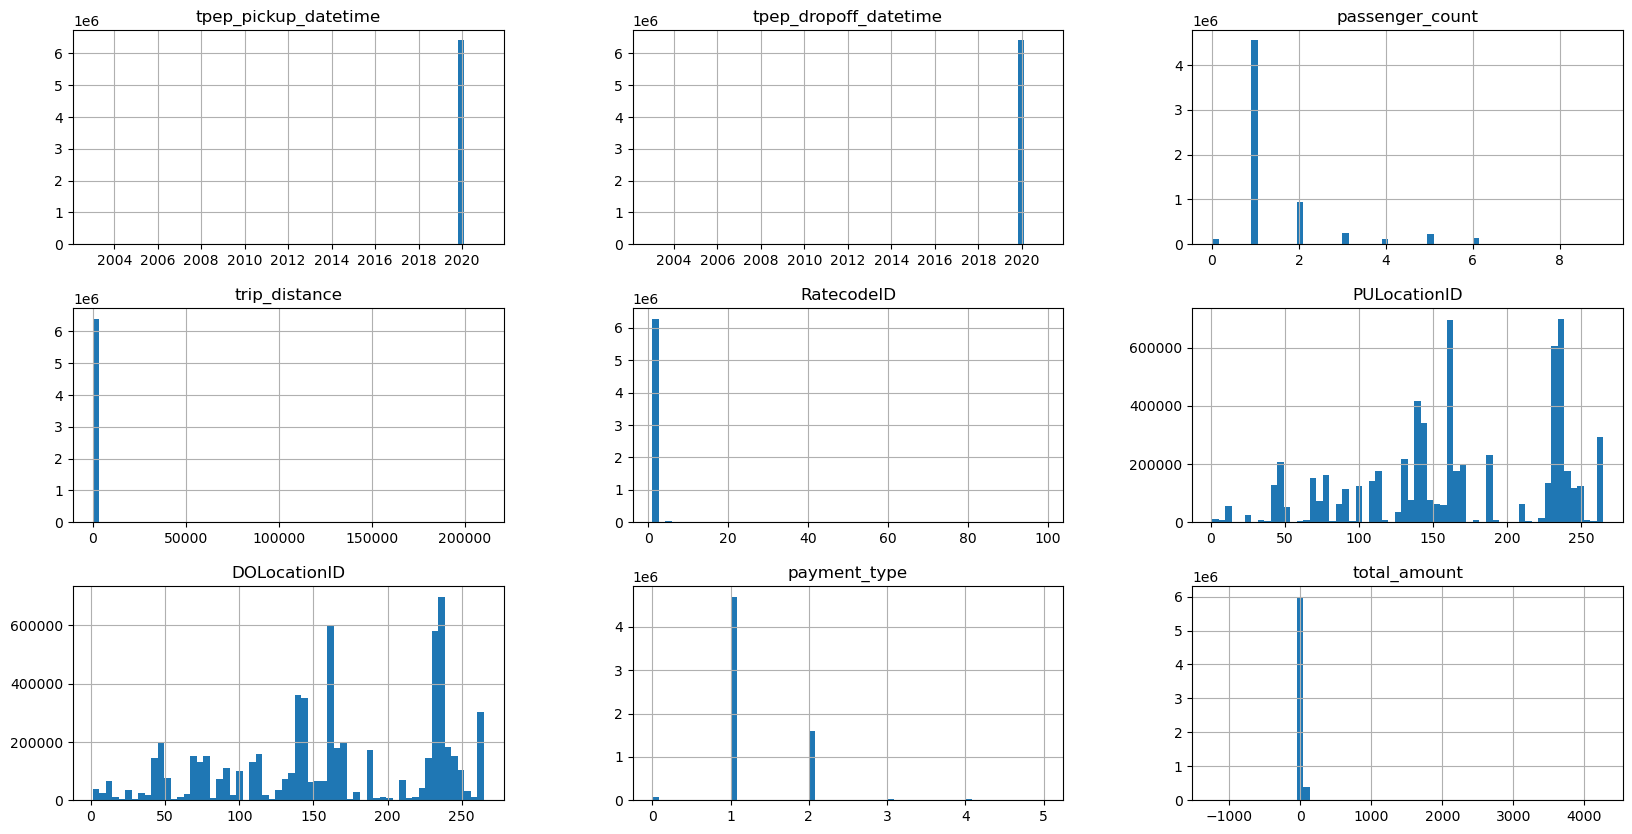

In [23]:
taxiDF.hist(figsize= (20,10), bins=60)
plt.show()

#Look into RateCodeID and Total Amount-- there looks like outliers

In [24]:
taxiDF['RatecodeID'].value_counts()
#Value range is accurate per data dictionary

RatecodeID
1.0     6126536
2.0      157733
5.0       36296
3.0       13476
4.0        5130
99.0        350
6.0          46
Name: count, dtype: int64

In [25]:
taxiDF.reset_index()

,index,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount
0,0,2020-01-01 00:28:15,2020-01-01 00:33:03,1.0,1.20,1.0,238,239,1,11.27
1,1,2020-01-01 00:35:39,2020-01-01 00:43:04,1.0,1.20,1.0,239,238,1,12.30
2,2,2020-01-01 00:47:41,2020-01-01 00:53:52,1.0,0.60,1.0,238,238,1,10.80
3,3,2020-01-01 00:55:23,2020-01-01 01:00:14,1.0,0.80,1.0,238,151,1,8.16
4,4,2020-01-01 00:01:58,2020-01-01 00:04:16,1.0,0.00,1.0,193,193,2,4.80
...,...,...,...,...,...,...,...,...,...,...
6405003,6405003,2020-01-31 23:08:00,2020-01-31 23:34:00,NaN,12.07,NaN,191,35,0,55.73
6405004,6405004,2020-01-31 23:00:00,2020-01-31 23:44:00,NaN,23.48,NaN,186,117,0,63.68
6405005,6405005,2020-01-31 23:13:00,2020-01-31 23:38:00,NaN,12.09,NaN,164,131,0,47.69
6405006,6405006,2020-01-31 23:02:54,2020-01-31 23:27:10,NaN,11.65,NaN,10,16,0,31.79


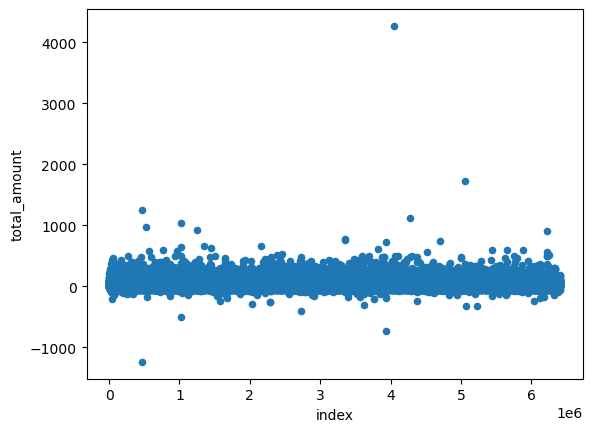

In [26]:
taxiDF.reset_index().plot(kind='scatter', y='total_amount', x='index')
plt.show()

#we have high outliers and negative numbers which doesnt make sense

There are 2 things to address that don't make sense- high outliers and negative numbers.

In [28]:
taxiDF[taxiDF['total_amount']<0].head() #19,500 negative values out of 6 million

#The negative values  come from disputes or no charge payment types so I am going to delete the negative values from dataset


,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount
160,2020-01-01 00:54:28,2020-01-01 00:58:41,1.0,0.60,1.0,170,137,3,-8.3
372,2020-01-01 00:57:13,2020-01-01 00:58:05,1.0,0.11,1.0,260,260,3,-3.8
667,2020-01-01 00:36:31,2020-01-01 00:37:23,3.0,0.18,1.0,141,141,3,-6.8
677,2020-01-01 00:23:15,2020-01-01 00:23:54,2.0,0.09,1.0,114,114,3,-6.3
1007,2020-01-01 00:13:39,2020-01-01 00:24:26,2.0,1.26,1.0,249,68,4,-12.3


In [29]:
taxiDF[taxiDF['total_amount']==0].head()
taxiDF[taxiDF['total_amount']==0]['trip_distance'].value_counts()
#will also be deleted amounts of $0 because majority of them had a distance of 0

trip_distance
0.00     1044
0.01       37
0.02       19
0.10       16
0.03       14
         ... 
18.67       1
4.93        1
2.57        1
14.81       1
1.31        1
Name: count, Length: 356, dtype: int64

<Axes: xlabel='index', ylabel='total_amount'>

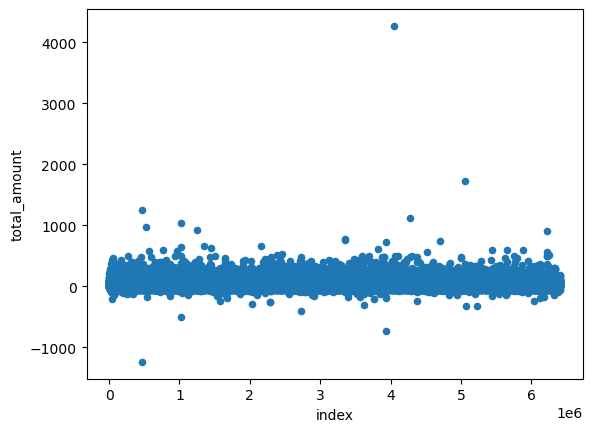

In [30]:
taxiDF.reset_index().plot(kind='scatter', x='index', y='total_amount')

In [31]:
taxiDF[taxiDF['total_amount']>250].shape

(584, 9)

In [32]:
taxiDF.total_amount.mean()
#Going to remove datapoints over $250

18.663148797003842

## Data Cleaning
1. Remove negative values from Total Amount
2. Remove 0's from Total Amount
3. Remove Total Amount above $250

In [35]:
datafiltered = taxiDF[    (taxiDF['total_amount']<250) & (taxiDF['total_amount']>0)     ]
datafiltered[datafiltered['total_amount']==0]

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount


In [38]:
datafiltered.isna().sum()

tpep_pickup_datetime         0
tpep_dropoff_datetime        0
passenger_count          65377
trip_distance                0
RatecodeID               65377
PULocationID                 0
DOLocationID                 0
payment_type                 0
total_amount                 0
dtype: int64

In [63]:
datafiltered[datafiltered['passenger_count'].isna()].head(3)
#These are part of a FlexFare which is similar to Uber payment up front. THis is only 1% of data so will also remove these data points

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount
6339567,2020-01-01 00:21:08,2020-01-01 00:50:54,NaN,7.49,NaN,17,82,0,36.14
6339568,2020-01-01 00:02:00,2020-01-01 00:25:00,NaN,9.69,NaN,137,212,0,40.70
6339569,2020-01-01 00:27:54,2020-01-01 00:41:15,NaN,3.03,NaN,236,42,0,26.41


In [61]:
datafilteredno0= datafiltered[datafiltered['payment_type']!=0]

## Data Preparation

In [70]:
dataprepared = datafilteredno0.copy()

In [87]:
dataprepared.dtypes

tpep_pickup_datetime     datetime64[us]
tpep_dropoff_datetime    datetime64[us]
passenger_count                   int64
trip_distance                   float64
RatecodeID                       object
PULocationID                     object
DOLocationID                     object
payment_type                     object
total_amount                    float64
dtype: object

In [85]:
#change categorical features to strings
dataprepared['RatecodeID'] = dataprepared['RatecodeID'].astype(str)
dataprepared['PULocationID']= dataprepared['PULocationID'].astype(str)
dataprepared['DOLocationID']= dataprepared['DOLocationID'].astype(str)
dataprepared['payment_type']= dataprepared['payment_type'].astype(str)
dataprepared['passenger_count']= dataprepared['passenger_count'].astype(int)

In [96]:
#separate datetime into categories
dataprepared['Date']= dataprepared['tpep_pickup_datetime'].dt.date
dataprepared['Year']= dataprepared['tpep_pickup_datetime'].dt.year
dataprepared['Month']= dataprepared['tpep_pickup_datetime'].dt.month
dataprepared['Day']= dataprepared['tpep_pickup_datetime'].dt.day
dataprepared['Hour']= dataprepared['tpep_pickup_datetime'].dt.hour

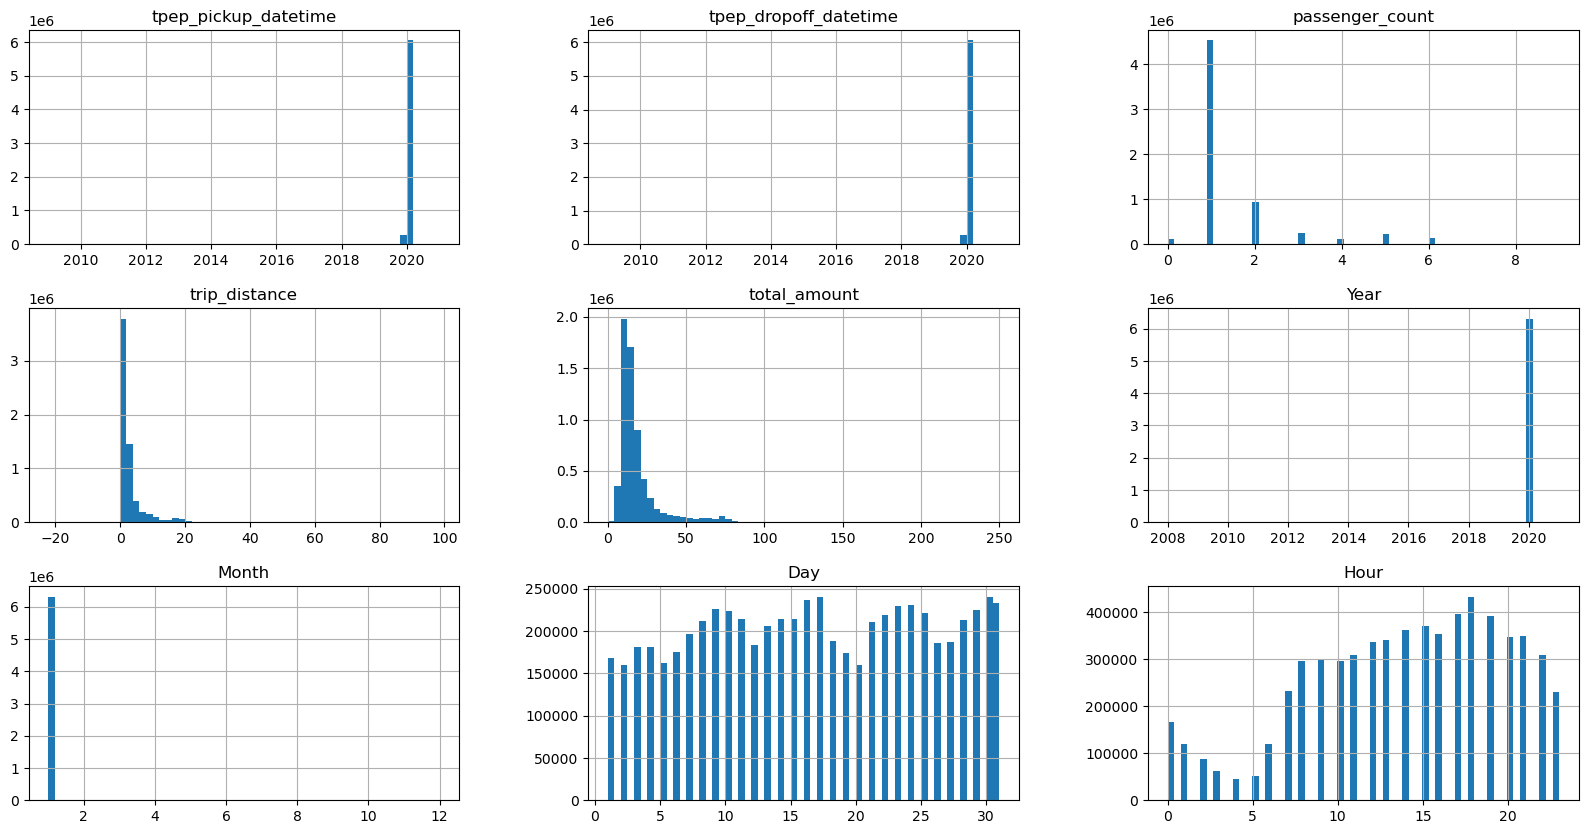

In [104]:
dataprepared.hist(figsize=(20,10), bins=60)
plt.show()

In [112]:
#Remove data that isn't in right year/month
dataprepared= dataprepared[dataprepared['Year']==2020]
dataprepared= dataprepared[dataprepared['Month']==1]

In [129]:
#only include relevant features and separate by categorical and numerical

catcolumns= ['PULocationID', 'Month', 'Day', 'Hour', 'Date' ]
numcolumns= ['total_amount','trip_distance']
allcol = catcolumns+ numcolumns

df= dataprepared[allcol]

In [148]:
#better to aggregate data by date and location 
#model predicts income for taxi driver in given hour instead of specific instances
datagroupedBYREGION = df.groupby(['PULocationID', 'Date', 'Month', 'Day', 'Hour']).mean().reset_index()
datagroupedBYREGION['countOfTransactions'] = df.groupby(['PULocationID', 'Date', 'Month', 'Day', 'Hour']).count().reset_index()['total_amount']

<Axes: >

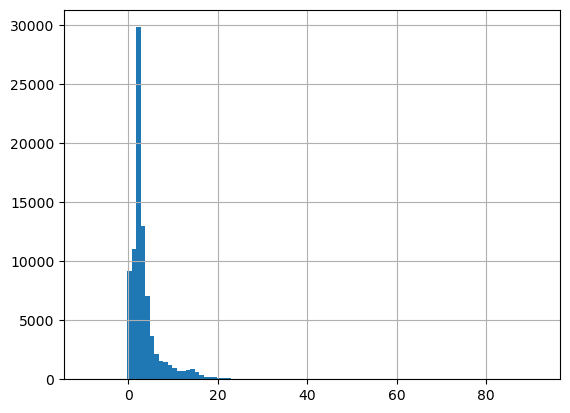

In [160]:
datagroupedBYREGION['trip_distance'].hist(bins=100)

<Axes: >

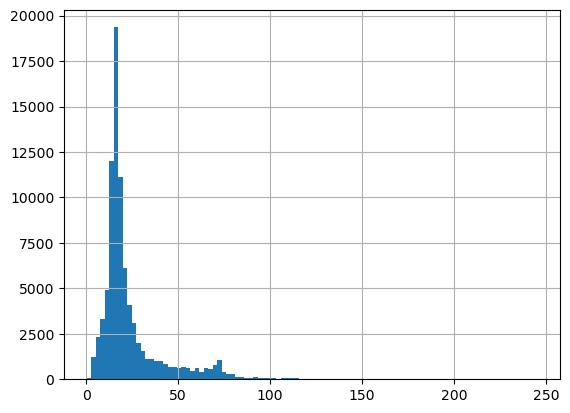

In [158]:
datagroupedBYREGION['total_amount'].hist(bins=100)

## Benchmark Model

In [165]:
dataModel = datagroupedBYREGION.copy()

In [183]:
features = dataModel.drop(['total_amount','Date'], axis=1)
catfeatures = dataModel.drop(['total_amount','trip_distance', 'Date'], axis=1)
label = dataModel['total_amount']

In [199]:
from sklearn.model_selection import train_test_split
X = pd.get_dummies(features)

X_trainb, X_testb, y_trainb, y_testb = train_test_split(X, label, test_size=.2, random_state=42)


In [205]:
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor(max_depth=10)
tree.fit(X_trainb, y_trainb)

DecisionTreeRegressor(max_depth=10)

In [215]:
y_predb = tree.predict(X_testb)

17298

In [230]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, root_mean_squared_error

y_predb = tree.predict(X_testb)

print('mean absolute error', mean_absolute_error(y_testb,y_predb )  )
print('mean squared error', mean_squared_error(y_testb,y_predb ))
print('root mean squared error', root_mean_squared_error(y_testb,y_predb ))
print ('r2', r2_score(y_testb,y_predb ))

mean absolute error 8.864879187556246
mean squared error 238.34933789384954
root mean squared error 15.438566575101769
r2 0.3569739121016673


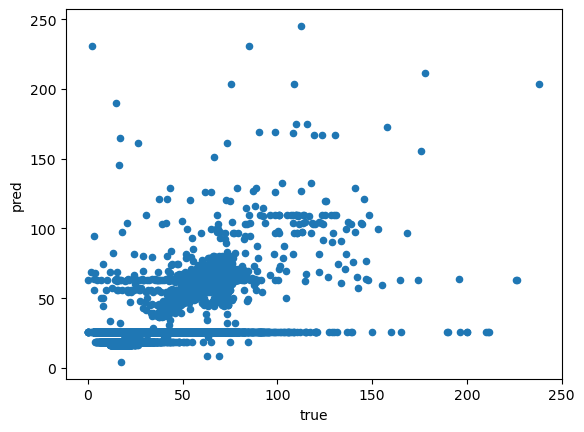

In [236]:
data = {'true':y_testb, 'pred': y_predb }
results=pd.DataFrame(data)

results.plot(kind='scatter', x='true', y='pred')
plt.show()

Is it overfit.... or is trip distance is not a good feature because its too coorelated

In [228]:
#newfeatures without distance
features = dataModel.drop(['total_amount','Date', 'trip_distance'], axis=1)
label = dataModel['total_amount']
X = pd.get_dummies(features)

#split data
X_trainb, X_testb, y_trainb, y_testb = train_test_split(X, label, test_size=.2, random_state=42)

#fit and predict
tree = DecisionTreeRegressor(max_depth=10)
tree.fit(X_trainb, y_trainb)
y_predb = tree.predict(X_testb)

#evaluate
print('mean absolute error', mean_absolute_error(y_testb,y_predb )  )
print('mean squared error', mean_squared_error(y_testb,y_predb ))
print('root mean squared error', root_mean_squared_error(y_testb,y_predb ))
print ('r2', r2_score(y_testb,y_predb ))

mean absolute error 8.864879187556246
mean squared error 238.34933789384954
root mean squared error 15.438566575101769
r2 0.3569739121016673


Model is significantly worse... as expecting

## Feature Engineering

In [341]:
dataNF = dataModel.copy()

In [343]:
dataNF['Date']= pd.to_datetime(dataNF['Date'])
dataNF['Weekday']= dataNF['Date'].dt.weekday
dataNF['Weekend']= dataNF['Weekday'].apply(lambda x: True if x==5 or x==6 else False)

In [345]:
from pandas.tseries.holiday import USFederalHolidayCalendar

dataNF['Date']= dataNF['Date'].astype(str)
holidays=USFederalHolidayCalendar().holidays(start='2019', end= '2021').date
dataNF['is_holiday']= dataNF['Date'].isin(holidays)

In [347]:
zones = pd.read_csv('taxi_zone_lookup.csv')
zones['LocationID'] = zones['LocationID'].astype(str)
zones.dtypes

LocationID      object
Borough         object
Zone            object
service_zone    object
dtype: object

In [349]:
dataNF = dataNF.merge(zones, left_on = 'PULocationID', right_on= 'LocationID', how = 'left')
dataNF= dataNF.drop(['LocationID', 'Zone', 'service_zone'], axis=1)

In [351]:
dataNF['Borough'].value_counts()

Borough
Manhattan        44869
Queens           18060
Brooklyn         16364
Bronx             5083
Unknown            744
EWR                376
Staten Island      285
Name: count, dtype: int64

In [464]:
dataNF.loc[dataNF['PULocationID']==265,'Borough'] = 'Outside of NYC'

## Adding Weather 
downloaded from https://www.kaggle.com/datasets/aadimator/nyc-weather-2016-to-2022?resource=download

In [467]:
weather = pd.read_csv('NYC_Weather_2016_2022.csv')

In [469]:
weather['time']=pd.to_datetime(weather['time'])
weather['Date_W']= weather['time'].dt.date
weather['Year_W']= weather['time'].dt.year
weather['Month_W']=weather['time'].dt.month
weather['Day_W']=weather['time'].dt.day
weather['Hour_W']=weather['time'].dt.hour

In [471]:
weather2020_1 = weather.loc[(weather['Year_W']==2020) & (weather['Month_W']==1)] 

In [473]:
dataWithWeather = dataNF.merge(weather2020_1, left_on = ['Month','Day','Hour'], right_on = ['Month_W','Day_W','Hour_W'], how='left')

In [475]:
dataWithWeather= dataWithWeather.drop(['Date_W', 'Month_W','Day_W','Hour_W'], axis=1)

In [498]:
dataWithWeather.isna().sum()

PULocationID             0
Date                     0
Month                    0
Day                      0
Hour                     0
total_amount             0
trip_distance            0
countOfTransactions      0
Weekday                  0
Weekend                  0
is_holiday               0
Borough                  0
time                     0
temperature_2m (°C)      0
precipitation (mm)       0
rain (mm)                0
cloudcover (%)           0
cloudcover_low (%)       0
cloudcover_mid (%)       0
cloudcover_high (%)      0
windspeed_10m (km/h)     0
winddirection_10m (°)    0
Year_W                   0
dtype: int64

In [494]:
dataWithWeather.loc[dataWithWeather['Borough'].isna(),'Borough'] = 'Outside of NYC'

## Model Training

In [507]:
dataformodel= dataWithWeather.copy()

In [503]:
input_features = ['PULocationID', 'Month', 'Day', 'Hour', 'Weekday', 'Weekend',
       'is_holiday', 'Borough', 'temperature_2m (°C)', 'precipitation (mm)','cloudcover_mid (%)','windspeed_10m (km/h)'  ]
target= 'total_amount'

X=dataformodel[input_features]
y=dataformodel[target]
X= pd.get_dummies(X)

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.2, random_state=42) 

In [522]:
from sklearn.tree import DecisionTreeRegressor
 #need MD or else it will overfit
decision_tree= DecisionTreeRegressor(max_depth=10)
decision_tree.fit(X_train, y_train)


DecisionTreeRegressor(max_depth=10)

In [524]:
y_pred = decision_tree.predict(X_testb)

print('mean absolute error', mean_absolute_error(y_test,y_pred )  )
print('mean squared error', mean_squared_error(y_test,y_pred ))
print('root mean squared error', root_mean_squared_error(y_test,y_pred ))
print ('r2', r2_score(y_test,y_pred ))

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- countOfTransactions
Feature names seen at fit time, yet now missing:
- Borough_Bronx
- Borough_Brooklyn
- Borough_EWR
- Borough_Manhattan
- Borough_Outside of NYC
- ...


#### Trying Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

RFmodel= RandomForestRegressor()
RFmodel.fit(X_train, y_train)
